In [22]:
!which python

/Users/rpranav955/miniconda3/envs/iris-course/bin/python


In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Local imports

In [25]:
sns.set()

# Load Data
Let's load the Iris flower dataset using scikit-learn's built in datasets.

In [26]:
data = datasets.load_iris()

In [27]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [31]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [32]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## What problem are we trying to solve?
We are trying to use the attributes of flowers to predict the species of the flower. Specifically, we are trying to use the sepal length and width and the petal length and width t predict if an Iris flower is of type Setosa, Versicolor or Virginica

# Create a pandas DataFrame from the data

In [41]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [42]:
df["target"] = data["target"]

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [44]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of features and target

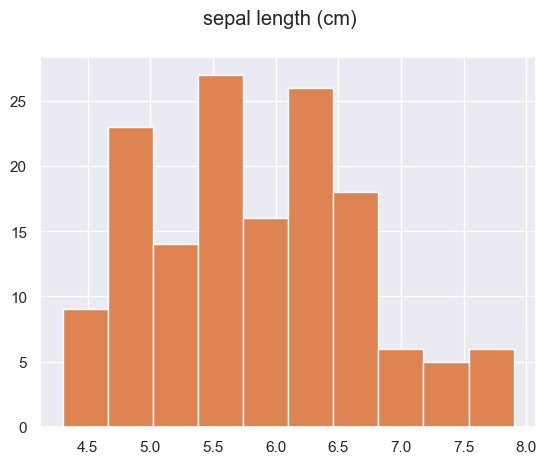

In [46]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

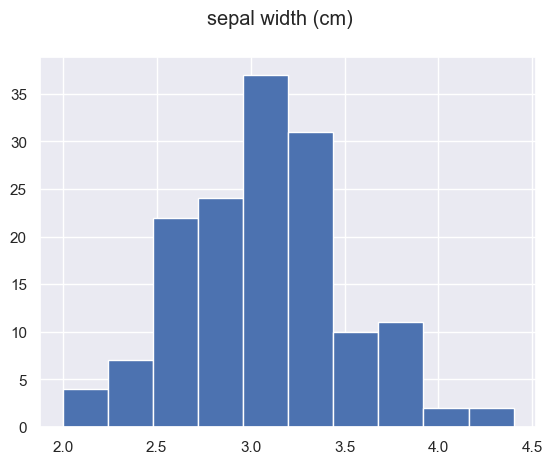

In [47]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

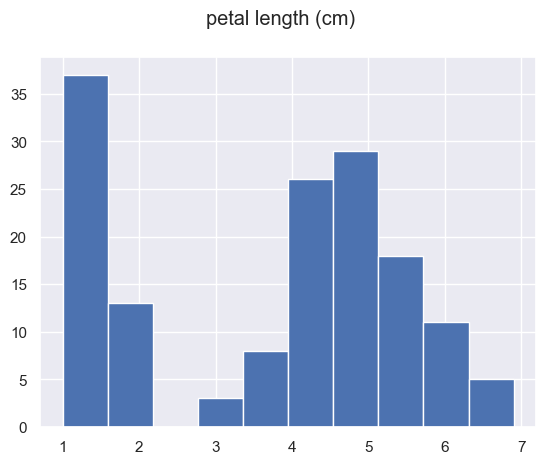

In [48]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

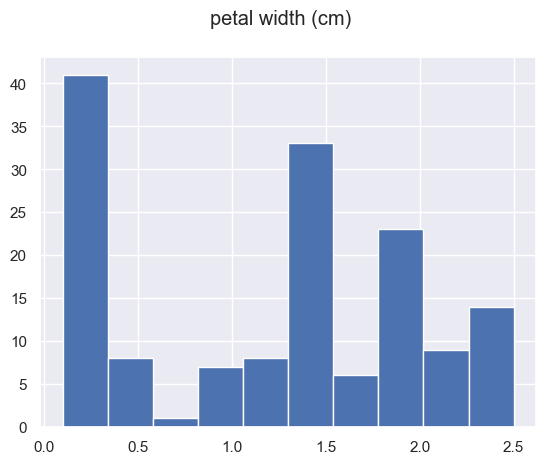

In [49]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of the data features with the target

In [59]:
# Create new column with the species name
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "viriginca"})

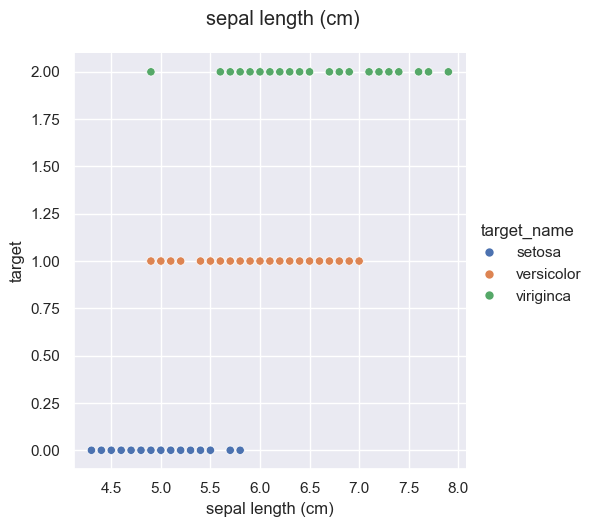

In [65]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y =1.05)
plt.show()

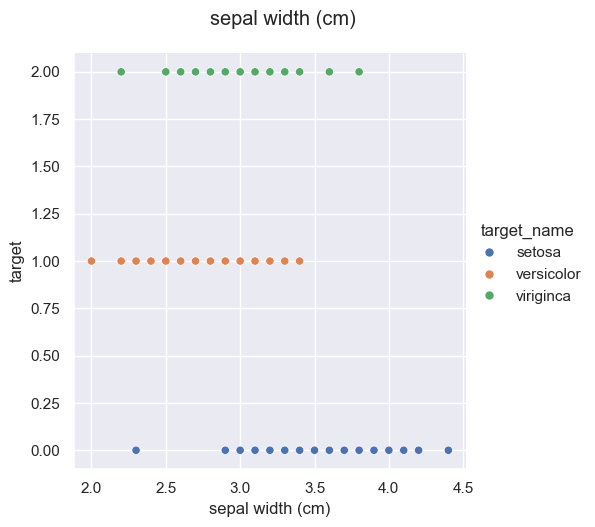

In [66]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y =1.05)
plt.show()

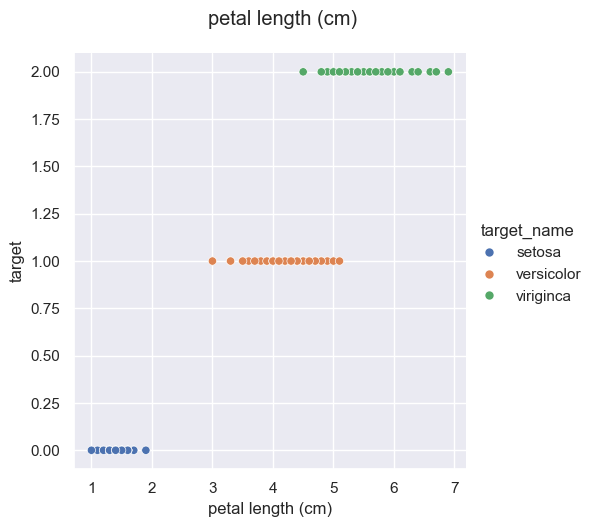

In [67]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y =1.05)
plt.show()

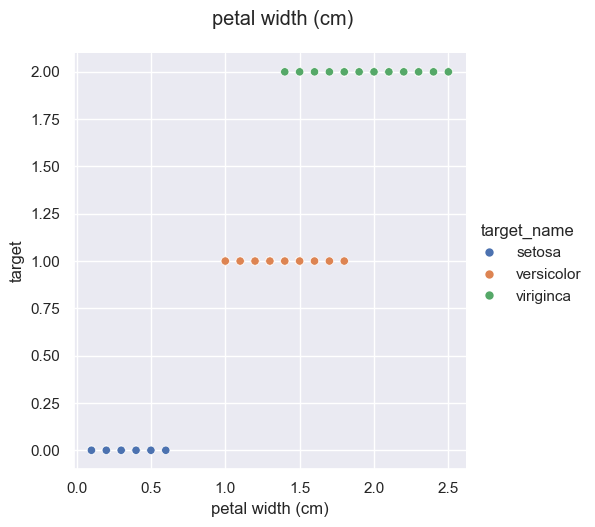

In [68]:
col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y =1.05)
plt.show()

# Exploratory Data Analysis (EDA) - Pairplots

In [85]:
sns.pairplot(df, hue="target_name")

# Train test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [73]:
df_train.shape

(112, 6)

In [74]:
df_test.shape

(38, 6)

In [75]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
89,5.5,2.5,4.0,1.3,1,versicolor
114,5.8,2.8,5.1,2.4,2,viriginca
141,6.9,3.1,5.1,2.3,2,viriginca
59,5.2,2.7,3.9,1.4,1,versicolor
126,6.2,2.8,4.8,1.8,2,viriginca


# Prepare our data for modeling
This include splitting the data back out into plain NumPy arrays.

In [78]:
x_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train["target"].values

In [79]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1,
       0, 1])

# Modeling - What is our baseline?

What is the simplest model we can think of?

In this case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point, we would expect to have a model accuracy of 0.33 or 33%, since we have 3 different classes that are evely balanced.

So our model should at least beat 33% accuracy.

# Modeling - Simple manual model

Let's manually look at our data and decide some cutoff points for classification.

In [87]:
def single_feature_prediction(petal_length):
    """Predicts the Iris species given the petal length."""
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [96]:
x_train[:,2]

array([4. , 5.1, 5.1, 3.9, 4.8, 4.5, 5.1, 4.5, 1.5, 1.6, 4.2, 1.5, 1.4,
       4.5, 6. , 3.9, 1.4, 4. , 4.4, 4.6, 1.4, 1.4, 1.9, 4.8, 5.7, 5.6,
       4. , 1.3, 1.4, 4.5, 1.4, 3.7, 5.8, 5.9, 4.3, 1.4, 1.5, 1.4, 4.9,
       6.1, 1.4, 5.4, 5.1, 1.6, 1. , 5.1, 4.6, 1.5, 4.5, 1.3, 1.3, 1.7,
       5.7, 4.2, 5.2, 5.8, 5.3, 1.3, 1.5, 4.1, 1.7, 1.3, 1.5, 5.4, 6.6,
       1.2, 5.7, 1.6, 5.6, 1.1, 1.5, 5.6, 4.7, 6.7, 5.1, 6.1, 4.9, 1.6,
       4.5, 4.7, 4.9, 4.4, 5.3, 1.3, 4.2, 3.3, 5. , 4. , 4.6, 5. , 5.5,
       4.3, 3.5, 5.1, 1.5, 6.1, 1.6, 5.1, 1.5, 3.9, 5.8, 6.4, 4.7, 5. ,
       4.8, 1.2, 3.3, 4.9, 1.4, 3. , 1.5, 4. ])

In [99]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:,2]])

In [101]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [104]:
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}%")

Manual model accuracy: 94.64%


# Modeling - Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

### Using a validation set to evaluate our model

In [119]:
model = LogisticRegression(max_iter=200)

In [109]:
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size = 0.25)

In [120]:
model.fit(xt, yt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [124]:
y_pred = model.predict(xv)

In [121]:
np.mean(y_pred == yv)

np.float64(0.9285714285714286)

In [125]:
model.score(xv, yv)

0.8571428571428571

### Using cross-validation to evaluate our model

In [126]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [127]:
model = LogisticRegression(max_iter=200)

In [128]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [129]:
np.mean(accuracies)

np.float64(0.9375494071146244)

# Where are we misclassifying points?

In [130]:
y_pred = cross_val_predict(model, x_train, y_train, cv = 5)

In [132]:
predicted_correctly_mask = y_pred == y_train

In [133]:
not_predicted_correctly = ~predicted_correctly_mask

In [134]:
x_train[~predicted_correctly_mask]

array([[6.2, 2.8, 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 3. , 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.2, 5. , 1.5],
       [5.9, 3.2, 4.8, 1.8]])

In [135]:
df_predictions = df_train.copy()

In [137]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [138]:
df_predictions["prediction"] = y_pred

In [141]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [142]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
89,5.5,2.5,4.0,1.3,1,versicolor,True,1,versicolor
114,5.8,2.8,5.1,2.4,2,viriginca,True,2,virginica
141,6.9,3.1,5.1,2.3,2,viriginca,True,2,virginica
59,5.2,2.7,3.9,1.4,1,versicolor,True,1,versicolor
126,6.2,2.8,4.8,1.8,2,viriginca,False,1,versicolor


In [145]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target_name", data=df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

In [149]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)

    
    plt.show()

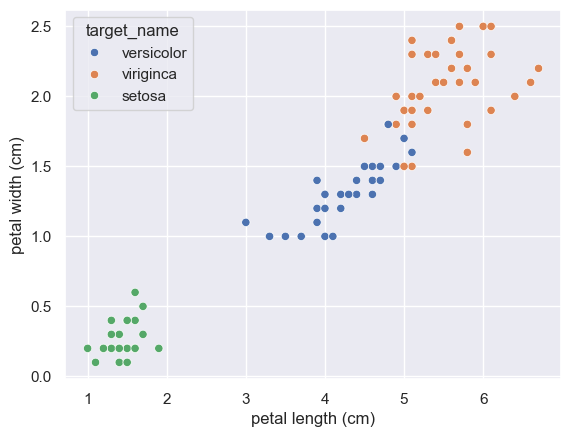

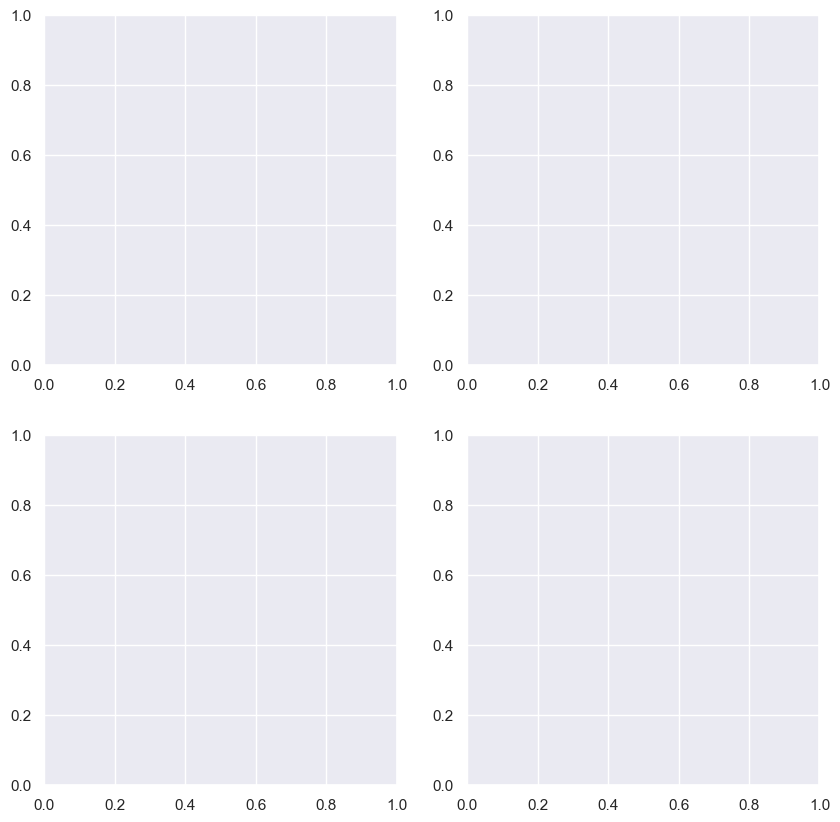

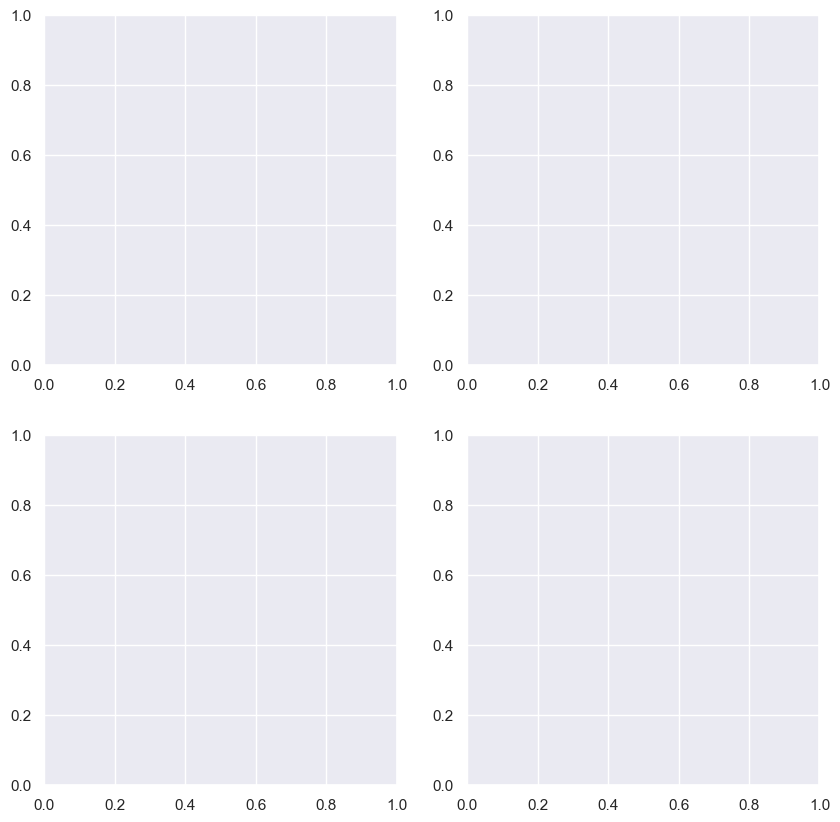

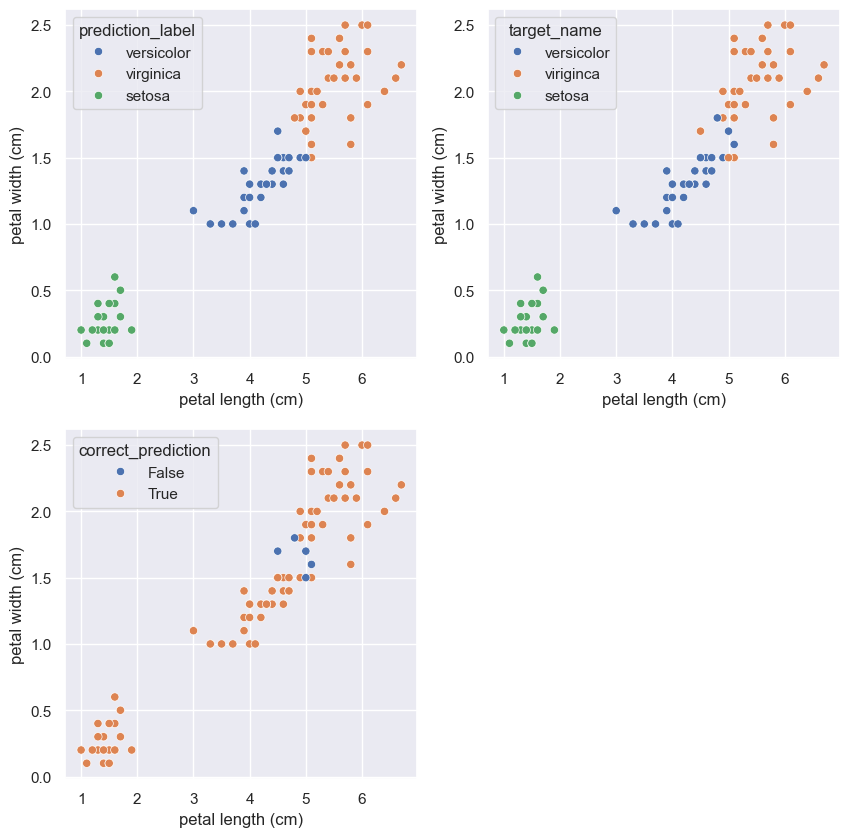

In [151]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

# Model Tuning

In [158]:
for reg_param in (1, 1.3, 1.8, 2, 2.3, 2.9, 3):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")

1
Accuracy: 93.75%
1.3
Accuracy: 93.75%
1.8
Accuracy: 93.75%
2
Accuracy: 94.66%
2.3
Accuracy: 94.66%
2.9
Accuracy: 94.66%
3
Accuracy: 94.66%


# Final Model

In [159]:
model = LogisticRegression(max_iter=200, C=2)

# How well does our model do the Test set?

In [160]:
x_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

In [161]:
x_test.shape

(38, 4)

In [162]:
y_test

array([0, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2])

### Train our final model using our full Training Dataset

In [163]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,2
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [167]:
y_test_pred = model.predict(x_test)

In [168]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [169]:
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}")

Test set accuracy: 100.00
